In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.feature_extraction import DictVectorizer

from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, GridSearchCV
from sklearn.model_selection import GridSearchCV, ParameterGrid

import numpy as np
import matplotlib.pyplot as plt

In [ ]:
portuguese = pd.read_csv('student_portuguese_clean.csv')
portuguese

,student_id,school,sex,age,address_type,family_size,parent_status,mother_education,father_education,mother_job,...,family_relationship,free_time,social,weekday_alcohol,weekend_alcohol,health,absences,grade_1,grade_2,final_grade
0,1,GP,F,18,Urban,Greater than 3,Apart,higher education,higher education,at_home,...,4,3,4,1,1,3,4,0,11,11
1,2,GP,F,17,Urban,Greater than 3,Living together,primary education (4th grade),primary education (4th grade),at_home,...,5,3,3,1,1,3,2,9,11,11
2,3,GP,F,15,Urban,Less than or equal to 3,Living together,primary education (4th grade),primary education (4th grade),at_home,...,4,3,2,2,3,3,6,12,13,12
3,4,GP,F,15,Urban,Greater than 3,Living together,higher education,5th to 9th grade,health,...,3,2,2,1,1,5,0,14,14,14
4,5,GP,F,16,Urban,Greater than 3,Living together,secondary education,secondary education,other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,645,MS,F,19,Rural,Greater than 3,Living together,5th to 9th grade,secondary education,services,...,5,4,2,1,2,5,4,10,11,10
645,646,MS,F,18,Urban,Less than or equal to 3,Living together,secondary education,primary education (4th grade),teacher,...,4,3,4,1,1,1,4,15,15,16
646,647,MS,F,18,Urban,Greater than 3,Living together,primary education (4th grade),primary education (4th grade),other,...,1,1,1,1,1,5,6,11,12,9
647,648,MS,M,17,Urban,Less than or equal to 3,Living together,secondary education,primary education (4th grade),services,...,2,4,5,3,4,2,6,10,10,10


In [ ]:
portuguese.corrwith(portuguese["final_grade"]).sort_values().reset_index(name="Correlation")

<ipython-input-31-9d8aa6f2d327>:1: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  portuguese.corrwith(portuguese["final_grade"]).sort_values().reset_index(name="Correlation")


,index,Correlation
0,class_failures,-0.393316
1,weekday_alcohol,-0.204719
2,student_id,-0.176843
3,weekend_alcohol,-0.176619
4,free_time,-0.122705
5,age,-0.106505
6,health,-0.098851
7,absences,-0.091379
8,social,-0.087641
9,family_relationship,0.063361


In [ ]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.metrics import accuracy_score


In [ ]:
#randomforest
all_portuguese_features = portuguese.drop(['grade_1', 'grade_2', 'final_grade'], axis=1)
features = all_portuguese_features
y_pred = portuguese['final_grade']
label_encoders = {}
for column in features.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    features[column] = label_encoders[column].fit_transform(features[column])
X_train, X_test, y_train, y_test = train_test_split(features, y_pred, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
rf_regressor = RandomForestRegressor(n_estimators=100, max_depth=15, random_state=42)
rf_regressor.fit(X_train, y_train)
predictions = rf_regressor.predict(X_test)
mse = mean_squared_error(y_test, predictions)
rmse = mse ** 0.5

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print()

Mean Squared Error: 8.084221785826923
Root Mean Squared Error: 2.843276593268218



In [ ]:
#Gradient Boosting
!pip install xgboost
import xgboost as xgb

all_portuguese_features = portuguese.drop(['grade_1', 'grade_2', 'final_grade'], axis=1)
features = all_portuguese_features
y_pred = portuguese['final_grade']
continuous = [
    'age',
    'class_failures',
    'family_relationship',
    'free_time',
    'social',
    'weekday_alcohol',
    'weekend_alcohol',
    'health',
    'absences',
]
encoder = OneHotEncoder(sparse=False, drop='first')
encoded_cats = encoder.fit_transform(features[continuous])
encoded_df = pd.DataFrame(encoded_cats, columns=encoder.get_feature_names_out(continuous))
features = features.drop(columns=continuous)
features = pd.concat([features, encoded_df], axis=1)
label_encoders = {}
for column in features.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    features[column] = label_encoders[column].fit_transform(features[column])
X_train, X_test, y_train, y_test = train_test_split(features, y_pred, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

xgb_reg = xgb.XGBRegressor(objective ='reg:squarederror',
                           colsample_bytree = 0.3,
                           learning_rate = 0.1,
                           max_depth = 5,
                           alpha = 10,
                           n_estimators = 100)
xgb_reg.fit(X_train, y_train)
predictions = xgb_reg.predict(X_test)
mse = mean_squared_error(y_test, predictions)
rmse = mse ** 0.5
print("RMSE: ", rmse)

RMSE:  2.662971326277258


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
portuguese['final_grade'].describe()

count    649.000000
mean      11.906009
std        3.230656
min        0.000000
25%       10.000000
50%       12.000000
75%       14.000000
max       19.000000
Name: final_grade, dtype: float64

In [ ]:
portugal = portuguese.copy()
final_grade_labels = ['fail', 'satisfactory', 'good', 'very good', 'excellent']
final_grade_bins = [0, 10, 14, 16, 18, 20]
portugal['final_grade_bin'] = pd.cut(portugal['final_grade'], bins=final_grade_bins, labels=final_grade_labels, right=False)
absences_labels = ['perfect', 'occasionally', 'frequent', 'excessive']
absences_bins = [0, 1, 5, 10, 35]
portugal['absences_bin'] = pd.cut(portugal['absences'], bins=absences_bins, labels=absences_labels, right=False)
portugal.columns

Index(['student_id', 'school', 'sex', 'age', 'address_type', 'family_size',
       'parent_status', 'mother_education', 'father_education', 'mother_job',
       'father_job', 'school_choice_reason', 'guardian', 'travel_time',
       'study_time', 'class_failures', 'school_support', 'family_support',
       'extra_paid_classes', 'activities', 'nursery_school', 'higher_ed',
       'internet_access', 'romantic_relationship', 'family_relationship',
       'free_time', 'social', 'weekday_alcohol', 'weekend_alcohol', 'health',
       'absences', 'grade_1', 'grade_2', 'final_grade', 'final_grade_bin',
       'absences_bin'],
      dtype='object')

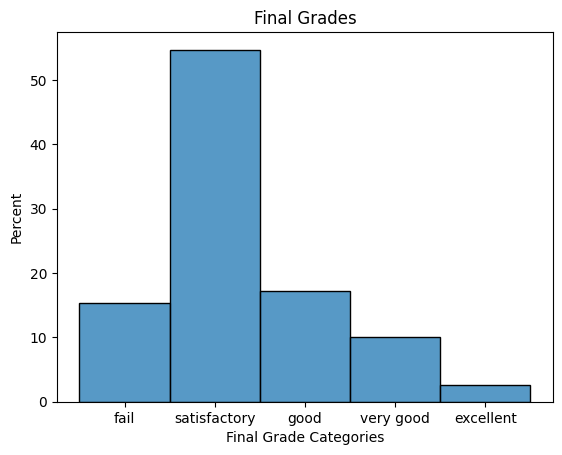

In [ ]:
sns.histplot(data=portugal, x = 'final_grade_bin', stat='percent')
plt.title('Final Grades')
plt.xlabel('Final Grade Categories');

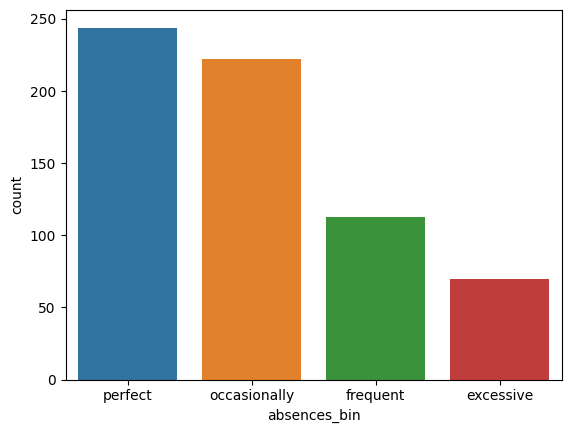

In [ ]:
sns.countplot(data=portugal, x='absences_bin');

In [ ]:
portugal = portuguese.copy()
final_grade_labels = ['fail', 'satisfactory', 'good', 'very good', 'excellent']
final_grade_bins = [0, 10, 14, 16, 18, 20]
portugal['final_grade_bin'] = pd.cut(portugal['final_grade'], bins=final_grade_bins, labels=final_grade_labels, right=False)
absences_labels = ['perfect', 'occasionally', 'frequent', 'excessive']
absences_bins = [0, 1, 5, 10, 35]
portugal['absences_bin'] = pd.cut(portugal['absences'], bins=absences_bins, labels=absences_labels, right=False)
#all_portuguese_features = portugal.drop(['grade_1', 'grade_2', 'final_grade', 'final_grade_bin'], axis=1)
#features = all_portuguese_features
y_pred = portugal['final_grade_bin']
continuous = [

]
#portugal = portugal[continuous]
#portugal = portugal.drop(['grade_1', 'grade_2', 'final_grade', 'final_grade_bin', 'absences', 'student_id', 'age', 'school'], axis=1)
portugal = portugal[['study_time', 'class_failures', 'mother_education', 'father_education', 'health', 'social', 'internet_access', 'family_support']]
encoder = OneHotEncoder(sparse=False, drop='first')
encoded_cats = encoder.fit_transform(portugal[continuous])
encoded_df = pd.DataFrame(encoded_cats, columns=encoder.get_feature_names_out(continuous))
portugal = portugal.drop(columns=continuous)
portugal = pd.concat([portugal, encoded_df], axis=1)
label_encoders = {}
for column in portugal.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    portugal[column] = label_encoders[column].fit_transform(portugal[column])
X_train, X_test, y_train, y_test = train_test_split(portugal, y_pred, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

clf = DecisionTreeClassifier(random_state = 42)
clf.fit(X_train, y_train)
print(accuracy_score(clf.predict(X_train), y_train))
print(accuracy_score(clf.predict(X_test), y_test))

0.9402697495183044
0.4230769230769231


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


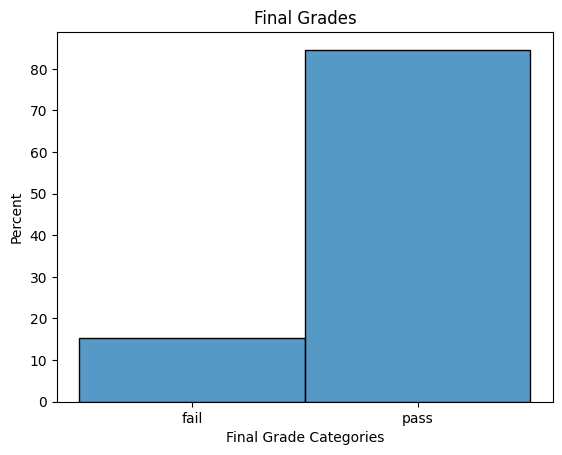

In [ ]:
portugal = portuguese.copy()
final_grade_labels = ['fail', 'pass']
final_grade_bins = [0, 10, 20]
portugal['final_grade_bin'] = pd.cut(portugal['final_grade'], bins=final_grade_bins, labels=final_grade_labels, right=False)
sns.histplot(data=portugal, x='final_grade_bin', stat='percent')
plt.title('Final Grades')
plt.xlabel('Final Grade Categories');

In [ ]:
p = portugal[portugal['final_grade_bin'] == 'pass']
p

,student_id,school,sex,age,address_type,family_size,parent_status,mother_education,father_education,mother_job,...,free_time,social,weekday_alcohol,weekend_alcohol,health,absences,grade_1,grade_2,final_grade,final_grade_bin
0,1,GP,F,18,Urban,Greater than 3,Apart,higher education,higher education,at_home,...,3,4,1,1,3,4,0,11,11,pass
1,2,GP,F,17,Urban,Greater than 3,Living together,primary education (4th grade),primary education (4th grade),at_home,...,3,3,1,1,3,2,9,11,11,pass
2,3,GP,F,15,Urban,Less than or equal to 3,Living together,primary education (4th grade),primary education (4th grade),at_home,...,3,2,2,3,3,6,12,13,12,pass
3,4,GP,F,15,Urban,Greater than 3,Living together,higher education,5th to 9th grade,health,...,2,2,1,1,5,0,14,14,14,pass
4,5,GP,F,16,Urban,Greater than 3,Living together,secondary education,secondary education,other,...,3,2,1,2,5,0,11,13,13,pass
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
643,644,MS,F,18,Rural,Greater than 3,Living together,higher education,higher education,teacher,...,4,3,2,2,5,4,7,9,10,pass
644,645,MS,F,19,Rural,Greater than 3,Living together,5th to 9th grade,secondary education,services,...,4,2,1,2,5,4,10,11,10,pass
645,646,MS,F,18,Urban,Less than or equal to 3,Living together,secondary education,primary education (4th grade),teacher,...,3,4,1,1,1,4,15,15,16,pass
647,648,MS,M,17,Urban,Less than or equal to 3,Living together,secondary education,primary education (4th grade),services,...,4,5,3,4,2,6,10,10,10,pass


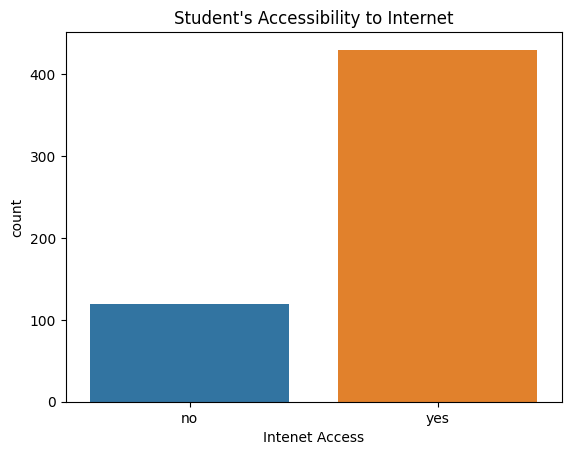

In [ ]:
#EDA
sns.countplot(x = 'internet_access', data = p)
plt.title('Student\'s Accessibility to Internet');
plt.xlabel('Internet Access');

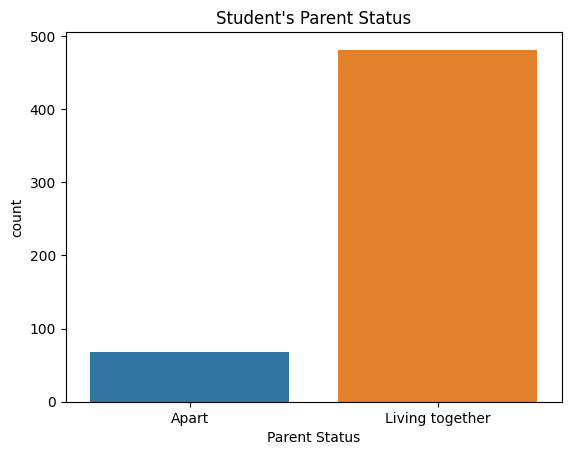

In [ ]:
#EDA
sns.countplot(x = 'parent_status', data = p)
plt.title('Student\'s Parent Status');
plt.xlabel('Parent Status');

In [ ]:

portugal = portuguese.copy()
final_grade_labels = [0, 1]
final_grade_bins = [0, 10, 20]
portugal['final_grade_bin'] = pd.cut(portugal['final_grade'], bins=final_grade_bins, labels=final_grade_labels, right=False)
absences_labels = ['perfect', 'occasionally', 'frequent', 'excessive']
absences_bins = [0, 1, 5, 10, 35]
portugal['absences_bin'] = pd.cut(portugal['absences'], bins=absences_bins, labels=absences_labels, right=False)
portugal['mom_higher_education'] = portugal['mother_education'].apply(lambda x: 1 if 'higher education' in x.lower() else 0)
portugal['dad_higher_education'] = portugal['father_education'].apply(lambda x: 1 if 'higher education' in x.lower() else 0)
y_pred = portugal['final_grade_bin']
continuous = [

]
portugal = portugal[['internet_access', 'family_support','social','school_support', 'parent_status', 'family_relationship', 'higher_ed']]
encoder = OneHotEncoder(sparse=False, drop='first')
encoded_cats = encoder.fit_transform(portugal[continuous])
encoded_df = pd.DataFrame(encoded_cats, columns=encoder.get_feature_names_out(continuous))
portugal = portugal.drop(columns=continuous)
portugal = pd.concat([portugal, encoded_df], axis=1)
label_encoders = {}
for column in portugal.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    portugal[column] = label_encoders[column].fit_transform(portugal[column])
X_train, X_test, y_train, y_test = train_test_split(portugal, y_pred, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

clf = DecisionTreeClassifier(random_state = 42)
clf.fit(X_train, y_train)
print(accuracy_score(clf.predict(X_train), y_train))
print(accuracy_score(clf.predict(X_test), y_test))

0.8940269749518305
0.8769230769230769


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)

precision_train = precision_score(y_train, y_pred_train)
f1_train = f1_score(y_train, y_pred_train)
recall_train = recall_score(y_train, y_pred_train)

precision_test = precision_score(y_test, y_pred_test)
f1_test = f1_score(y_test, y_pred_test)
recall_test = recall_score(y_test, y_pred_test)

print("Precision on Training Set:", precision_train)
print("Precision on Test Set:", precision_test)

print("F1 Score on Training Set:", f1_train)
print("F1 Score on Testing Set:", f1_test)

print("Recall Score on Train Set:", recall_train)
print("Recall on Test Set:", recall_test)

Precision on Training Set: 0.9128540305010894
Precision on Test Set: 0.9304347826086956
F1 Score on Training Set: 0.9384098544232923
F1 Score on Testing Set: 0.9304347826086956
Recall Score on Train Set: 0.9654377880184332
Recall on Test Set: 0.9304347826086956
